In [1]:
#spinnyyyy all cities car details
import pandas as pd 
import json
li=[]
for i in range(1,15):
    d= 'https://api.spinny.com/sp-consumer-search/product/listing/?city=hyderabad&product_type=cars&category=used&page={}'.format(i)
    li.append(d)
for i in range(1,35):
    d= 'https://api.spinny.com/sp-consumer-search/product/listing/?city=bangalore&product_type=cars&category=used&page={}'.format(i)
    li.append(d)
for i in range(1,15):
    d= 'https://api.spinny.com/sp-consumer-search/product/listing/?city=mumbai&product_type=cars&category=used&page={}'.format(i)
    li.append(d)
for i in range(1,25):
    d= 'https://api.spinny.com/sp-consumer-search/product/listing/?city=delhi-ncr&product_type=cars&category=used&page={}'.format(i)
    li.append(d)
append_data=[]
for i in li:
    data = pd.read_json(i)
    f=pd.json_normalize(data.results)
    f.drop('permanent_url',inplace=True, axis=1)
    f.drop('on_hold', inplace=True, axis=1)
    f.drop('expected_live_date', inplace=True, axis=1)
    f.drop('hold_end_time', inplace=True, axis=1)
    append_data.append(f)
append_data = pd.concat(append_data)  
append_data.to_excel('data_pred.xlsx')

In [117]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [49]:
data  = pd.read_excel('final_data.xlsx')
data.tail()

,make,model,variant,body_type,mileage,fuel_type,transmission,year,city,price,images,it
10226,Volvo,Country,D3 Inscription,Hatchback,100000,Diesel,Automatic,2016,New Delhi,1375000,[{'img': 'https://stimg2.cardekho.com/images/u...,0
10227,Volvo,XC40,T4 R-Design,SUV,20000,Petrol,Automatic,2021,Gurgaon,3600000,[{'img': 'https://images10.gaadicdn.com/usedca...,0
10228,Volvo,S60,T6 Summum,Sedan,78000,Petrol,Automatic,2011,Hyderabad,1275000,[{'img': 'https://images10.gaadicdn.com/usedca...,0
10229,Volvo,XC40,T4 R-Design,SUV,11000,Petrol,Automatic,2020,Mumbai,3850000,[{'img': 'https://images10.gaadicdn.com/usedca...,0
10230,Volvo,S60,T4 Inscription,Sedan,12000,Petrol,Automatic,2021,New Delhi,4700000,[{'img': 'https://images10.gaadicdn.com/usedca...,0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10231 entries, 0 to 10230
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make          10231 non-null  object
 1   model         10231 non-null  object
 2   variant       10231 non-null  object
 3   body_type     10230 non-null  object
 4   mileage       10231 non-null  int64 
 5   fuel_type     10231 non-null  object
 6   transmission  10231 non-null  object
 7   year          10231 non-null  int64 
 8   city          10231 non-null  object
 9   price         10231 non-null  int64 
 10  images        10231 non-null  object
 11  it            10231 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 959.3+ KB


In [51]:
data.body_type.value_counts()

Hatchback          2944
Sedan              2544
SUV                2481
hatchback           870
MUV                 465
suv                 409
sedan               377
muv                  43
crossover            21
Convertibles         19
Minivans             18
Luxury Vehicles      15
Coupe                14
Pickup Trucks         7
Wagon                 3
Name: body_type, dtype: int64

In [52]:
data['body_type'].str.lower()

0            coupe
1              suv
2              suv
3              suv
4              suv
           ...    
10226    hatchback
10227          suv
10228        sedan
10229          suv
10230        sedan
Name: body_type, Length: 10231, dtype: object

In [53]:
data['body_type']=data['body_type'].str.lower()

In [54]:
data.body_type.value_counts()

hatchback          3814
sedan              2921
suv                2890
muv                 508
crossover            21
convertibles         19
minivans             18
luxury vehicles      15
coupe                14
pickup trucks         7
wagon                 3
Name: body_type, dtype: int64

In [55]:
data['fuel_type']=data['fuel_type'].str.lower()

In [56]:
data.fuel_type.value_counts()

petrol      6220
diesel      3754
cng          220
electric      29
lpg            8
Name: fuel_type, dtype: int64

In [57]:
data.isnull().sum()

make            0
model           0
variant         0
body_type       1
mileage         0
fuel_type       0
transmission    0
year            0
city            0
price           0
images          0
it              0
dtype: int64

<AxesSubplot:>

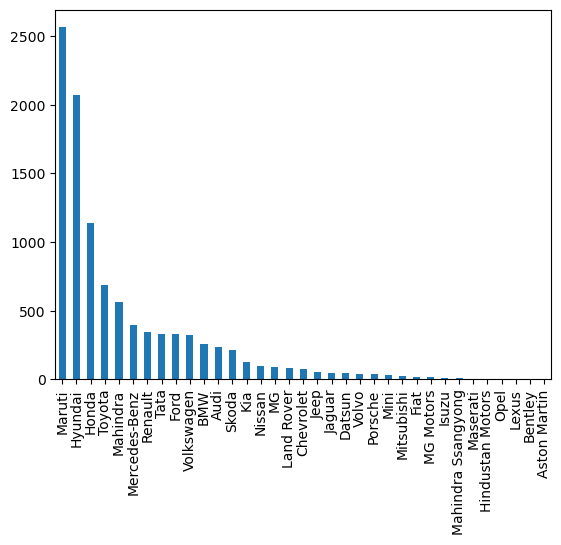

In [61]:
data.make.value_counts()

In [59]:
data['make'] = data['make'].replace(regex=['Maruti Suzuki'], value='Maruti')

In [136]:
data[data['make']=='Porsche']

,make,model,variant,body_type,mileage,fuel_type,transmission,year,city,price
8264,Porsche,Cayenne,Diesel,suv,90000,diesel,automatic,2015,Gurgaon,4400000
8265,Porsche,Cayenne,Diesel Platinum Edition,suv,65000,diesel,automatic,2017,Gurgaon,6625000
8266,Porsche,Cayenne,Diesel,suv,90000,diesel,automatic,2015,Gurgaon,4400000
8267,Porsche,Cayenne,Diesel Platinum Edition,suv,65000,diesel,automatic,2017,Gurgaon,6625000
8268,Porsche,Cayenne,Diesel,suv,90000,diesel,automatic,2015,Gurgaon,4400000
8269,Porsche,Cayenne,Diesel Platinum Edition,suv,65000,diesel,automatic,2017,Gurgaon,6625000
8270,Porsche,Cayenne,Diesel,suv,90000,diesel,automatic,2015,Gurgaon,4400000
8271,Porsche,Cayenne,Diesel Platinum Edition,suv,65000,diesel,automatic,2017,Gurgaon,6625000
8272,Porsche,Cayenne,Diesel Platinum Edition,suv,49000,diesel,automatic,2016,Gurgaon,6450000
8273,Porsche,Cayenne,Diesel,suv,121000,diesel,automatic,2011,Mumbai,2430000


In [135]:
data=data.drop(8298).reset_index(drop=True)

In [73]:
data['body_type'].isnull().sum()

0

In [72]:
data['body_type'].fillna("minivans", inplace = True)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10231 entries, 0 to 10230
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make          10231 non-null  object
 1   model         10231 non-null  object
 2   variant       10231 non-null  object
 3   body_type     10231 non-null  object
 4   mileage       10231 non-null  int64 
 5   fuel_type     10231 non-null  object
 6   transmission  10231 non-null  object
 7   year          10231 non-null  int64 
 8   city          10231 non-null  object
 9   price         10231 non-null  int64 
 10  images        10231 non-null  object
 11  it            10231 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 959.3+ KB


In [90]:
data['make'].value_counts()

Maruti                2566
Hyundai               2070
Honda                 1135
Toyota                 685
Mahindra               563
Mercedes-Benz          392
Renault                342
Tata                   330
Ford                   328
Volkswagen             324
BMW                    258
Audi                   236
Skoda                  212
Kia                    122
Nissan                  94
MG                      91
Land Rover              83
Chevrolet               76
Jeep                    53
Jaguar                  45
Datsun                  43
Volvo                   39
Porsche                 35
Mini                    27
Mitsubishi              26
Fiat                    17
MG Motors               13
Isuzu                   11
Mahindra Ssangyong       7
Maserati                 2
Hindustan Motors         2
Opel                     1
Lexus                    1
Bentley                  1
Aston Martin             1
Name: make, dtype: int64

In [96]:
data['city'].value_counts()

Mumbai           2942
Delhi            2653
Bangalore        2241
Hyderabad        1205
Gurgaon           383
Thane             288
Noida             284
Faridabad         130
Ghaziabad          83
Greater Noida       9
Virar               6
Ajmer               2
Bhayandar           2
vasai               2
Mira Road           1
Name: city, dtype: int64

In [93]:
data['city'] = data['city'].replace(regex=['Mumbai Mumbai'], value='Mumbai')

In [95]:
data['city'] = data['city'].replace(regex=['New Delhi'], value='Delhi')

In [76]:
data['transmission']=data['transmission'].str.lower()

In [100]:
data.tail()

,make,model,variant,body_type,mileage,fuel_type,transmission,year,city,price,images,it
10226,Volvo,Country,D3 Inscription,hatchback,100000,diesel,automatic,2016,Delhi,1375000,[{'img': 'https://stimg2.cardekho.com/images/u...,0
10227,Volvo,XC40,T4 R-Design,suv,20000,petrol,automatic,2021,Gurgaon,3600000,[{'img': 'https://images10.gaadicdn.com/usedca...,0
10228,Volvo,S60,T6 Summum,sedan,78000,petrol,automatic,2011,Hyderabad,1275000,[{'img': 'https://images10.gaadicdn.com/usedca...,0
10229,Volvo,XC40,T4 R-Design,suv,11000,petrol,automatic,2020,Mumbai,3850000,[{'img': 'https://images10.gaadicdn.com/usedca...,0
10230,Volvo,S60,T4 Inscription,sedan,12000,petrol,automatic,2021,Delhi,4700000,[{'img': 'https://images10.gaadicdn.com/usedca...,0


In [101]:
data.reset_index(drop=True)

,make,model,variant,body_type,mileage,fuel_type,transmission,year,city,price,images,it
0,Aston Martin,Vantage,V8 Sport,coupe,19003,petrol,automatic,2013,Mumbai,7395000,[{'img': 'https://images10.gaadicdn.com/usedca...,0
1,Audi,Q5,3.0 TDI Quattro,suv,130000,diesel,automatic,2011,Ajmer,1250000,[{'img': 'https://images10.gaadicdn.com/usedca...,0
2,Audi,Q3,2.0 TDI Quattro Premium Plus,suv,160000,diesel,automatic,2012,Ajmer,1250000,[{'img': 'https://images10.gaadicdn.com/usedca...,0
3,Audi,Q5,30 TDI quattro Premium Plus,suv,104000,diesel,automatic,2015,Bangalore,2550000,[{'img': 'https://images10.gaadicdn.com/usedca...,0
4,Audi,Q3,2.0 TDI Quattro Premium Plus,suv,49000,diesel,automatic,2015,Bangalore,1875000,[{'img': 'https://images10.gaadicdn.com/usedca...,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10226,Volvo,Country,D3 Inscription,hatchback,100000,diesel,automatic,2016,Delhi,1375000,[{'img': 'https://stimg2.cardekho.com/images/u...,0
10227,Volvo,XC40,T4 R-Design,suv,20000,petrol,automatic,2021,Gurgaon,3600000,[{'img': 'https://images10.gaadicdn.com/usedca...,0
10228,Volvo,S60,T6 Summum,sedan,78000,petrol,automatic,2011,Hyderabad,1275000,[{'img': 'https://images10.gaadicdn.com/usedca...,0
10229,Volvo,XC40,T4 R-Design,suv,11000,petrol,automatic,2020,Mumbai,3850000,[{'img': 'https://images10.gaadicdn.com/usedca...,0


In [102]:
columns = ['images', 'it']
data.drop(columns, inplace=True, axis=1)

In [103]:
data.head()

,make,model,variant,body_type,mileage,fuel_type,transmission,year,city,price
0,Aston Martin,Vantage,V8 Sport,coupe,19003,petrol,automatic,2013,Mumbai,7395000
1,Audi,Q5,3.0 TDI Quattro,suv,130000,diesel,automatic,2011,Ajmer,1250000
2,Audi,Q3,2.0 TDI Quattro Premium Plus,suv,160000,diesel,automatic,2012,Ajmer,1250000
3,Audi,Q5,30 TDI quattro Premium Plus,suv,104000,diesel,automatic,2015,Bangalore,2550000
4,Audi,Q3,2.0 TDI Quattro Premium Plus,suv,49000,diesel,automatic,2015,Bangalore,1875000


In [137]:
data.describe()

,mileage,year,price
count,10228.0000,10228.0000,10228.0000
mean,52904.8039,2015.6751,999956.2254
std,35037.0197,3.3913,1173959.6840
min,101.0000,1990.0000,35000.0000
25%,29000.0000,2014.0000,416750.0000
50%,49710.0000,2016.0000,635000.0000
75%,70742.0000,2018.0000,1049999.2500
max,665000.0000,2022.0000,13635000.0000


In [105]:
pd.options.display.float_format = '{:.4f}'.format

In [131]:
data[data['price']==16700000]

,make,model,variant,body_type,mileage,fuel_type,transmission,year,city,price
8292,Porsche,Coupe,GTS Coupe,coupe,6000,petrol,automatic,2021,Delhi,16700000


In [124]:
data.shape

(10230, 10)

C:\Users\racha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage', ylabel='Density'>

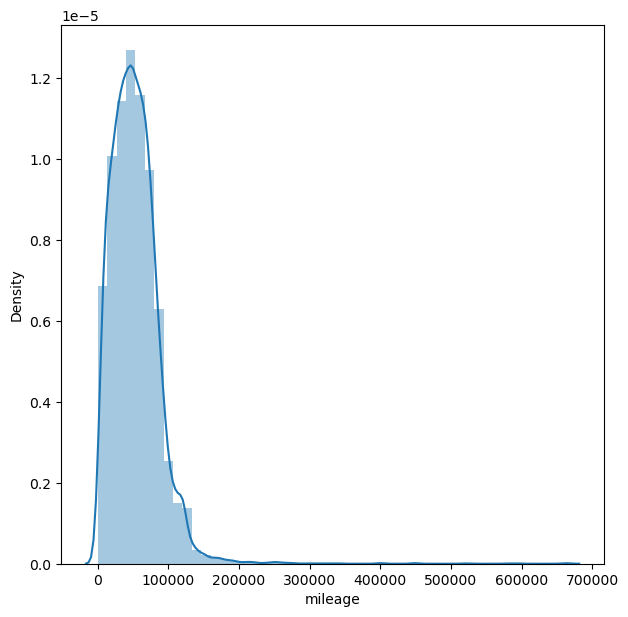

In [119]:
fig,ax = plt.subplots(figsize = (7,7))
sns.distplot(data.mileage)

C:\Users\racha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

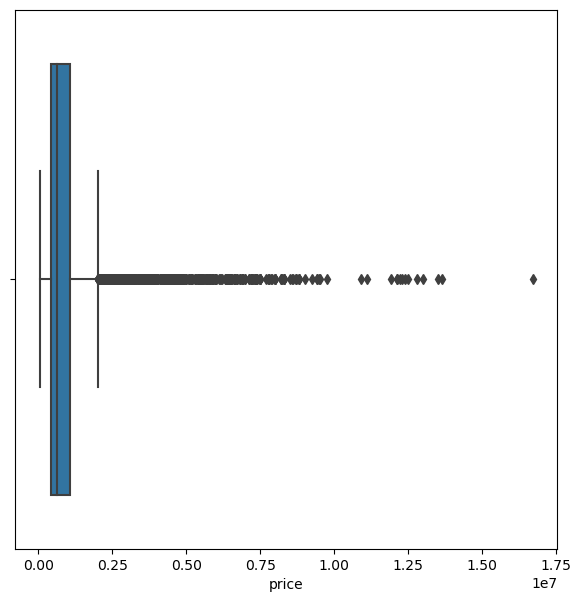

In [120]:
fig,ax = plt.subplots(figsize = (7,7))
sns.boxplot(data.price)

<AxesSubplot:xlabel='year', ylabel='count'>

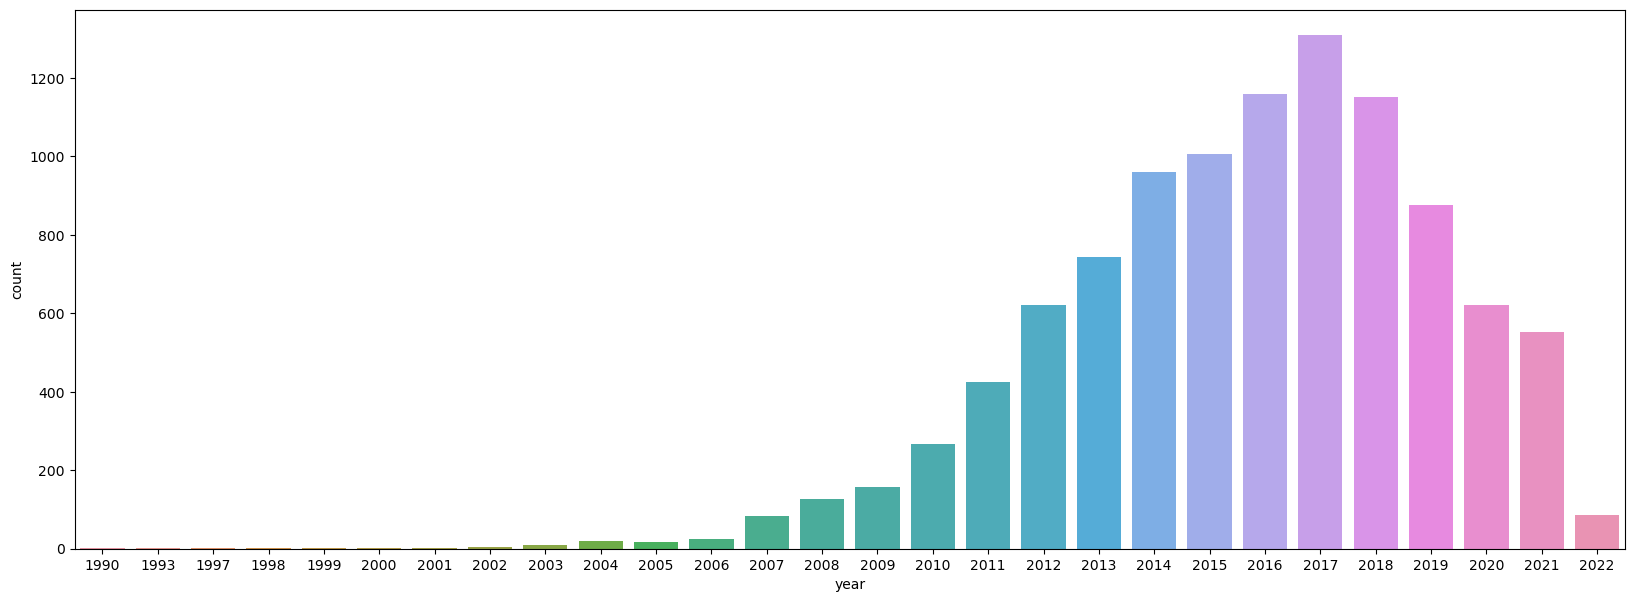

In [130]:
fig,ax = plt.subplots(figsize = (20,7))
sns.countplot(x = 'year'  ,data = data)

In [138]:
data.to_csv("Cleaned_spinny.csv")


In [214]:
model=data.model.value_counts()

In [215]:
model.to_csv('model2.csv')

In [211]:
data.drop(data[data['model']==2021].index,inplace=True)

In [206]:
data.drop(data[data['model']==35].index,inplace=True)

In [207]:
data.drop(data[data['model']==2018].index,inplace=True)

In [208]:
data.drop(data[data['model']==718].index,inplace=True)

In [209]:
data.drop(data[data['model']==2].index,inplace=True)

In [210]:
data.drop(data[data['model']==100].index,inplace=True)

In [224]:
data['model'].replace(
    to_replace=[800],
    value='Alto800',
    inplace=True
)

In [227]:
data['model'].replace(
    to_replace=[300],
    value='XUV300',
    inplace=True
)

In [296]:
data[data['model']=='Alto800']

,make,model,variant,body_type,mileage,fuel_type,transmission,year,city,price
5054,Maruti,Alto800,CNG LXI Optional,hatchback,42000,cng,manual,2018,Faridabad,335000
5057,Maruti,Alto800,CNG LXI,hatchback,34000,cng,manual,2017,Faridabad,310000
5074,Maruti,Alto800,CNG LXI,hatchback,65234,cng,manual,2016,Mumbai,295000
5076,Maruti,Alto800,CNG LXI,hatchback,80827,cng,manual,2018,Mumbai,319000
5078,Maruti,Alto800,CNG LXI Optional,hatchback,60562,cng,manual,2018,Mumbai,310000
...,...,...,...,...,...,...,...,...,...,...
6911,Maruti,Alto800,LXI,hatchback,29209,petrol,manual,2015,Delhi,230000
6961,Maruti,Alto800,LXI,hatchback,33000,petrol,manual,2019,Noida,355000
6965,Maruti,Alto800,LXI,hatchback,42000,petrol,manual,2014,Noida,240000
6972,Maruti,Alto800,LXI,hatchback,60976,petrol,manual,2015,Thane,265000


# modell building

In [264]:
X=data.drop(columns='price')
y=data['price']

In [265]:
X.head()

,make,model,variant,body_type,mileage,fuel_type,transmission,year,city
0,Aston Martin,Vantage,V8 Sport,coupe,19003,petrol,automatic,2013,Mumbai
1,Audi,Q5,3.0 TDI Quattro,suv,130000,diesel,automatic,2011,Ajmer
2,Audi,Q3,2.0 TDI Quattro Premium Plus,suv,160000,diesel,automatic,2012,Ajmer
3,Audi,Q5,30 TDI quattro Premium Plus,suv,104000,diesel,automatic,2015,Bangalore
4,Audi,Q3,2.0 TDI Quattro Premium Plus,suv,49000,diesel,automatic,2015,Bangalore


In [266]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10193 entries, 0 to 10227
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make          10193 non-null  object
 1   model         10193 non-null  object
 2   variant       10193 non-null  object
 3   body_type     10193 non-null  object
 4   mileage       10193 non-null  int64 
 5   fuel_type     10193 non-null  object
 6   transmission  10193 non-null  object
 7   year          10193 non-null  int64 
 8   city          10193 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.0+ MB


In [267]:
y.head()

0    7395000
1    1250000
2    1250000
3    2550000
4    1875000
Name: price, dtype: int64

In [233]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [268]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [269]:
ohe=OneHotEncoder()
ohe.fit(X[['make','model','variant','body_type','fuel_type','transmission','city']])

OneHotEncoder()

In [270]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['make','model','variant','body_type','fuel_type','transmission','city']),
                                    remainder='passthrough')

In [271]:
lr=LinearRegression()

In [272]:
pipe=make_pipeline(column_trans,lr)

In [273]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Aston Martin', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun',
       'Fiat', 'Ford', 'Hindustan Motors', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'MG', 'MG Motors',
       'Mahindra', 'Mahindra Ssangyong', 'M...
                                                                            array(['cng', 'diesel', 'electric', 'lpg', 'petrol'], dtype=object),
                                                                            array(['automatic', 'manual'], dtype=object),
                                                                            array(['Ajmer', 'Bangalore', 'Bhayandar', 'Delhi', 'Faridabad',
       'Ghaziabad', 'Greater Noida', 'Gurgaon', 'Hyderabad', 'Mira Road',
       'Mumbai', 'Noida', 'Thane', 'Virar', 'vasai'], dtype=object)]),
                                                  ['make', 'model', 'variant',
                                                   'body_type', 'fuel_type',
                                                   'transmission', 'city'])])),
                ('linearregression', LinearRegression())])

y_pred=pipe.predict(X_test)

In [275]:
y_pred=pipe.predict(X_test)

# checking r2score

In [276]:
r2_score(y_test,y_pred)

0.8549607653346403

In [277]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [279]:
import numpy as np
np.argmax(scores)

299

In [280]:
scores[np.argmax(scores)]

0.9488647875044786

# predicting samples

In [293]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Hyundai','i20','Sportz 1.2','hatchback',40000,'petrol','manual',2018,'Mumbai']).reshape(1, 9)))

array([749017.10900068])

In [301]:
pipe.predict(pd.DataFrame(columns=X_test.columns,
                          data=np.array(['Maruti','S-Cross','Delta 1.3','suv',70000,'diesel','manual',2015,'Hyderabad']).reshape(1, 9)))

array([509210.88270169])

# best model is found at a certain random state

In [295]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9488647875044786

In [304]:
import pickle 

In [ ]:
pickle.dump('Linear')